In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import xml.etree.ElementTree as ET
import matplotlib.patches as patches
import csv


In [2]:
ppDict = {}
with open('pp_pH5NoDex.txt', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter = ',')
    for row in spamreader:
        if row[0][0] == 'C':
            ppDict[row[0]] = row[1]

In [3]:
#parse the Kegg XML file for all of the compounds and edges

tree = ET.parse('sce01100.xml')
root = tree.getroot()
nodes = {}
for child in root:
    if child.attrib['type'] == 'compound':
        cid = child.attrib['name'].split(':')[1]
        nodes[cid] = {}

edges = []
for reaction in root.iter('reaction'):
    substrates = []
    for substrate in reaction.iter('substrate'):
        substrates.append(substrate.attrib['name'].split(':')[1])
    for product in reaction.iter('product'):
        pname = product.attrib['name'].split(':')[1]
        for substrate in substrates:
            edges.append((substrate,pname))


colors = []
for graphics in root.iter('graphics'):
    tempname = graphics.attrib['name']
    if tempname in nodes.keys():
        nodes[tempname]['x'] = graphics.attrib['x']
        nodes[tempname]['y'] = graphics.attrib['y']
        nodes[tempname]['color'] = graphics.attrib['fgcolor']
        color = graphics.attrib['fgcolor']
        if color not in colors:
            colors.append(color)
colors.remove('none')
colors.remove('#E0E0E0')

#see what colors we have here
print(colors)

['#FFB3CC', '#B3B3E6', '#99CCFF', '#80CCB3', '#FFCC66', '#FF9900', '#FF8080', '#9EE284', '#80CCCC', '#8080F7', '#CC99FF', '#DA8E82']


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


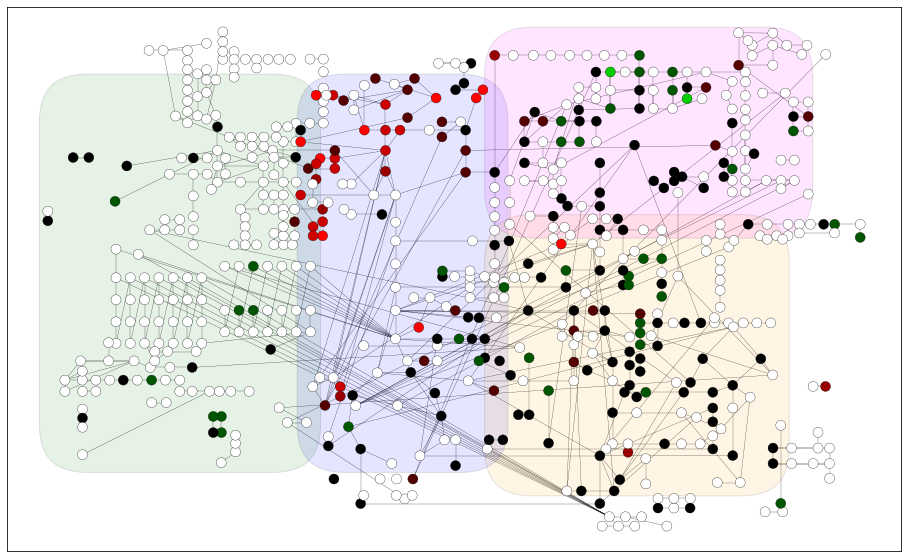

In [4]:
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111, aspect='equal')
Met = nx.Graph()
Met_unAnn = nx.Graph()
nodes_of_int = []
xvals = []
yvals = []
positions = {}
for node in nodes:
    
    color = nodes[node]['color']
    if color in colors:
        nodes_of_int.append(node)
        positions[node] = (int(nodes[node]['x']),(2200 - int(nodes[node]['y'])))
        xvals.append(int(nodes[node]['x']))
        yvals.append((2200 - int(nodes[node]['y'])))

Met.add_nodes_from(nodes_of_int)
Met.add_edges_from(edges)

color_map = []
for node in Met.nodes():
    if node in ppDict.keys():
        color = ppDict[node]
    else:
        color = "#FFFFFF"
    color_map.append(color)
    
#now make our boxes for the different groupings of metabolites

lipidbox = ax1.add_patch(
    patches.FancyBboxPatch(
        (400, 500),   # (x,y)
        800,          # width
        1300,          # height
        boxstyle = 'round',
        alpha = 0.1,
        facecolor = "green"
    )
)

lipidbox.set_boxstyle(boxstyle=patches.BoxStyle("Round", pad=200))

ccm = ax1.add_patch(
    patches.FancyBboxPatch(
        (1500, 500),   # (x,y)
        500,          # width
        1300,          # height
        boxstyle = 'round',
        alpha = 0.1,
        facecolor = "blue"
    )
)

ccm.set_boxstyle(boxstyle=patches.BoxStyle("Round", pad=200))

aabox = ax1.add_patch(
    patches.FancyBboxPatch(
        (2300, 400),   # (x,y)
        900,          # width
        800,          # height
        boxstyle = 'round',
        alpha = 0.1,
        facecolor = "orange"
    )
)

aabox.set_boxstyle(boxstyle=patches.BoxStyle("Round", pad=200))

ntbox = ax1.add_patch(
    patches.FancyBboxPatch(
        (2300, 1500),   # (x,y)
        1000,          # width
        500,          # height
        boxstyle = 'round',
        alpha = 0.1,
        facecolor = "magenta"
    )
)

ntbox.set_boxstyle(boxstyle=patches.BoxStyle("Round", pad=200))
    
#nodes
nx.draw_networkx_nodes(Met,pos = positions,node_color = color_map, node_size = 100, edge_color='k')

#edges
nx.draw_networkx_edges(Met,pos = positions,width=0.25)

ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 
ax.collections[0].set_linewidth(0.3) 

savename = 'networkfigure.svg'
fig1.savefig(savename)
